In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = 'http://www.sentiweb.fr/datasets/incidence-PAY-7.csv'

On extrait les données de varicelles depuis le site du [Réseau sentinelles](http://www.sentiweb.fr/france/fr/?page=table&maladie=7).



In [4]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data.head()

week  indicator   inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202136          7  4910     2188    7632       7           3         11   
1  202135          7  2592     1116    4068       4           2          6   
2  202134          7  1429      378    2480       2           0          4   
3  202133          7  3829     1830    5828       6           3          9   
4  202132          7  4108     1895    6321       6           3          9   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de valeurs manquantes a priori

In [8]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]

In [9]:
raw_data.head()

week  indicator   inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202136          7  4910     2188    7632       7           3         11   
1  202135          7  2592     1116    4068       4           2          6   
2  202134          7  1429      378    2480       2           0          4   
3  202133          7  3829     1830    5828       6           3          9   
4  202132          7  4108     1895    6321       6           3          9   

  geo_insee geo_name                period  
0        FR   France 2021-09-06/2021-09-12  
1        FR   France 2021-08-30/2021-09-05  
2        FR   France 2021-08-23/2021-08-29  
3        FR   France 2021-08-16/2021-08-22  
4        FR   France 2021-08-09/2021-08-15

In [10]:
sorted_data = raw_data.set_index('period').sort_index()
sorted_data.head()

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1990-12-03/1990-12-09           0          5        FR   France  
1990-12-10/1990-12-16          12         28        FR   France  
1990-12-17/1990-12-23          25         43        FR   France  
1990-12-24/1990-12-30          23         45        FR   France  
1990-12-31/1991-01-06          18         36        FR   France

In [11]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

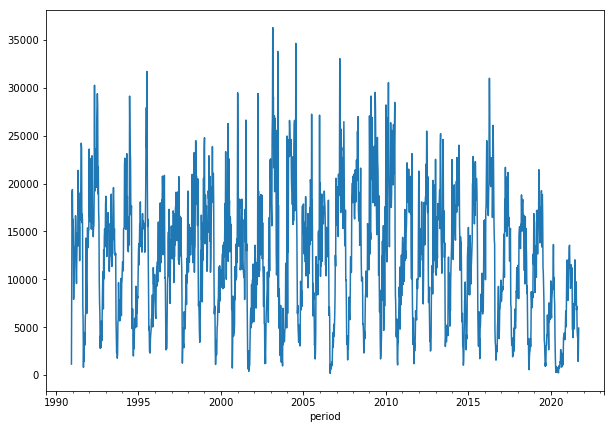

In [13]:
plt.figure(figsize = [10,7])
sorted_data['inc'].plot()

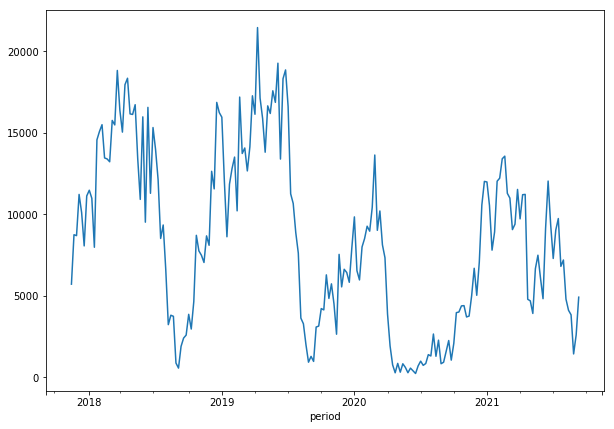

In [15]:
plt.figure(figsize = [10,7])
sorted_data['inc'][-200:].plot()

In [37]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1990,
                                    sorted_data.index[-1].year)]

In [42]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    
    if ( abs(len(one_year)-52) > 2):
        print(week1,len(one_year)) 
    else:
        yearly_incidence.append(one_year.sum())
        year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

1990-08-27/1990-09-02 38


L'année 90 n'est pas complète puisque les données ne correspondent qu'à 4 semaines en décembre. L'incidence de cette année n'est pas prise en compte 

In [40]:
sorted_data[sorted_data.week<199100]

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1990-12-03/1990-12-09           0          5        FR   France  
1990-12-10/1990-12-16          12         28        FR   France  
1990-12-17/1990-12-23          25         43        FR   France  
1990-12-24/1990-12-30          23         45        FR   France

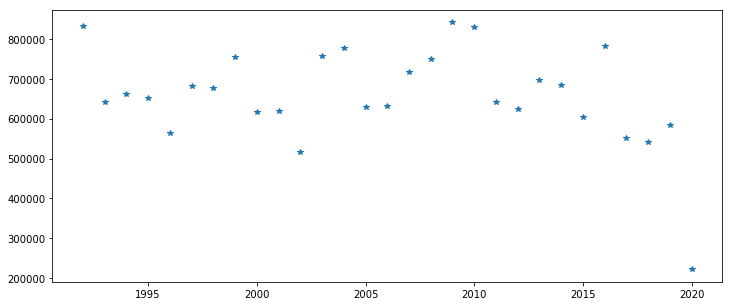

In [45]:
plt.figure(figsize = [12,5])
yearly_incidence.plot(style='*')

In [46]:
yearly_incidence.sort_values()

2020    221186
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

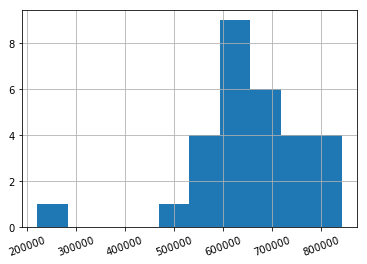

In [47]:
yearly_incidence.hist(xrot=20)